In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torch.utils.data import DataLoader
import numpy as np
from dataloader import SaliconCoCoDataset

In [3]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [4]:
dataset_folder = "../data/"
txt_path = "./train_list.txt"
img_list = np.loadtxt(txt_path, dtype=str)
dataset = SaliconCoCoDataset(dataset_folder, img_list)

BATCH_SIZE = 2
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

a = iter(train_loader).next()
print(a['image'].dtype, a['saliency'].dtype, a['mask'].dtype)
print(a['image'].shape, a['saliency'].shape, a['mask'].shape)

    

torch.float32 torch.float32 torch.float32
torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256]) torch.Size([2, 1, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 255.5, 255.5, -0.5)

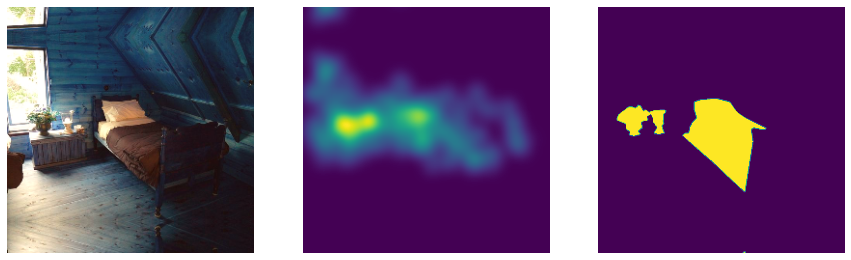

In [5]:
plt.subplot(1,3,1)
plt.imshow(a['image'][0].permute((1,2,0)).numpy()[:,:,::-1]*0.225+0.5)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(a['saliency'][0].permute((1,2,0)).numpy())
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(a['mask'][0].permute((1,2,0)).numpy())
plt.axis('off')

In [6]:
import torch

In [11]:
from model.net import SSNet
from model.loss import loss_sal

In [12]:
model = SSNet(3)

# model_dir = '../basnet_pretrained.pth'
model_dir = '../weights/SSNET_init.pth'
model.load_state_dict(torch.load(model_dir), strict=False)

for name, param in model.named_parameters():
    if "_sal" not in name:
        param.requires_grad = False


In [13]:
# # save weight
# model_dir = "../weights/"
# torch.save(model.state_dict(), model_dir + "SSNET_init.pth")


In [14]:
_ = model(a['image'], segmentation=True)

In [15]:
sal_out = model(a['image'], segmentation=False)

In [16]:
sal_out[0].shape, a['saliency'].squeeze().shape

(torch.Size([2, 1, 256, 256]), torch.Size([2, 256, 256]))

In [17]:
sal_out[0].type(), a['saliency'].type()

('torch.FloatTensor', 'torch.FloatTensor')

In [20]:
loss = loss_sal(sal_out[0].squeeze(), a['saliency'].squeeze())
loss

In [21]:
loss

In [39]:
loss.backward()

NameError: name 'loss' is not defined